In [1]:
from numpy import array
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import copy
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn import mixture
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix

In [2]:
df = datasets.load_digits()
Y = df.target
n_samples = len(df.images)
X = df.images.reshape((n_samples, -1))

In [3]:
# X = StandardScaler().fit_transform(data)

In [4]:
biclist = []
aiclist = []
nlist = []
j = 100000000000
nc = 0

In [5]:
for i in range(50,210,10):
    gmm = mixture.GaussianMixture(i,random_state=0,covariance_type='full').fit(X)
    b = gmm.bic(X)
    a = gmm.aic(X)
    biclist.append(b)
    aiclist.append(a)
    nlist.append(i)

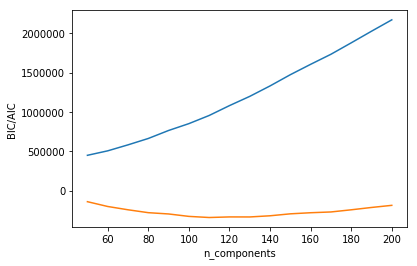

In [6]:
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.plot(nlist, biclist, label='BIC')
plt.plot(nlist, aiclist, label='AIC')

In [7]:
gmm = mixture.GaussianMixture(n_components=110).fit(X)
labels = gmm.predict(X)

In [8]:
cn = contingency_matrix(labels,Y)
# print(cn)
ans = 0
for i in cn:
    ans = ans + max(i)
purity = ans/len(X)
print(purity)

0.9693934335002783
